# **WCGAN**

In [1]:
# Import essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout


In [18]:
# Define paths
real_data_path = "/kaggle/input/wcgan-nsl-kdd/train_processed.csv"
balanced_data_path = "/kaggle/input/wcgan-nsl-kdd/train_balanced.csv"
test_data_path = "/kaggle/input/wcgan-nsl-kdd/test_processed.csv"

# Load datasets
real_data = pd.read_csv(real_data_path)
balanced_data = pd.read_csv(balanced_data_path)
test_data = pd.read_csv(test_data_path)

# Confirm shape
real_data.shape, balanced_data.shape, test_data.shape


((125973, 123), (134686, 245), (22544, 117))

In [9]:
# Helper to split features and labels + reshape for CNN
def preprocess_data(df):
    X = df.drop('label', axis=1).values
    y = df['label'].values

    # Encode labels
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # CNN expects 3D input: (samples, timesteps, features)
    X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
    return X_reshaped, y_encoded, encoder


In [10]:
# Use train_processed.csv
X_train_real, y_train_real, label_encoder = preprocess_data(real_data)
X_test, y_test, _ = preprocess_data(test_data)

print("Train shape:", X_train_real.shape)
print("Test shape:", X_test.shape)


Train shape: (125973, 122, 1)
Test shape: (22544, 116, 1)


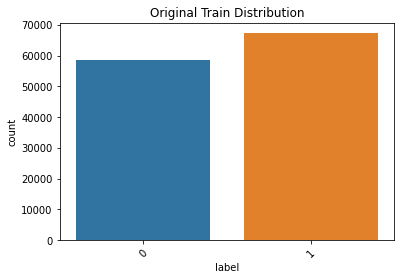

In [11]:
sns.countplot(x=real_data['label'])
plt.title("Original Train Distribution")
plt.xticks(rotation=45)
plt.show()


In [12]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [23]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 2: Load your CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/wcgan-nsl-kdd/train_processed.csv")

# Optional: Show the shape and first few rows
print("Shape of dataset:", df.shape)
print(df.head())

# Step 3: Split features (X) and labels (y)
X = df.drop('label', axis=1).values  # All columns except 'label'
y = df['label'].values               # Only the label column

# Step 4: Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Shape of dataset: (125973, 123)
   duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0  3.558064e-07  0.000000e+00   0.0             0.0     0.0  0.0   
1       0.0  1.057999e-07  0.000000e+00   0.0             0.0     0.0  0.0   
2       0.0  0.000000e+00  0.000000e+00   0.0             0.0     0.0  0.0   
3       0.0  1.681203e-07  6.223962e-06   0.0             0.0     0.0  0.0   
4       0.0  1.442067e-07  3.206260e-07   0.0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  ...  flag_RSTO  flag_RSTOS0  \
0                0.0        0.0              0.0  ...        0.0          0.0   
1                0.0        0.0              0.0  ...        0.0          0.0   
2                0.0        0.0              0.0  ...        0.0          0.0   
3                0.0        1.0              0.0  ...        0.0          0.0   
4                0.0        1.0              0.0  ...        0.0          0.0   

   flag_RSTR

In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 58, 128)           24704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 29, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3712)              0

> # **TRAIN REAL DATASET**

In [13]:
input_shape = X_train_real.shape[1:]
num_classes = len(np.unique(y_train_real))

model = create_cnn_model(input_shape, num_classes)
model.fit(X_train_real, y_train_real, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
1575/1575 [==============================] - 13s 3ms/step - loss: 0.0791 - accuracy: 0.9731 - val_loss: 0.0493 - val_accuracy: 0.9817
Epoch 2/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9808 - val_loss: 0.0373 - val_accuracy: 0.9877
Epoch 3/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0429 - accuracy: 0.9840 - val_loss: 0.0324 - val_accuracy: 0.9884
Epoch 4/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9863 - val_loss: 0.0255 - val_accuracy: 0.9902
Epoch 5/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9890 - val_loss: 0.0204 - val_accuracy: 0.9929
Epoch 6/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9902 - val_loss: 0.0171 - val_accuracy: 0.9944
Epoch 7/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9910 - val_loss: 0.0169 - val_accuracy

In [25]:
# Run this if your model expects 3D input (e.g., Conv1D or LSTM)
X_test_reshaped = np.expand_dims(X_test, axis=-1)  # reshape to (batch_size, 122, 1)
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


788/788 [==============================] - 2s 2ms/step - loss: 0.0162 - accuracy: 0.9945
Test Accuracy: 99.45%


Train Accuracy: 99.55%
Test Accuracy: 99.45%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11773
           1       0.99      1.00      0.99     13422

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



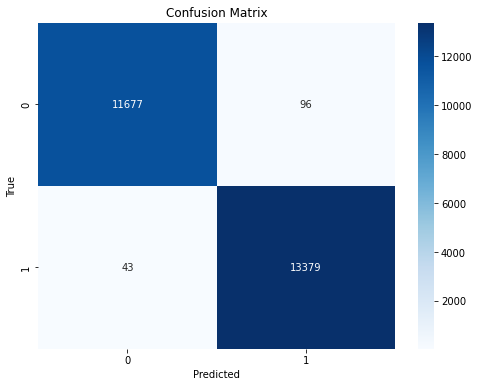

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Assuming these variables are defined:
# model: your trained keras model
# X_train, y_train, X_test, y_test: your data arrays
# label_encoder: your sklearn LabelEncoder fitted on y

# Reshape data if model expects 3D input (e.g. Conv1D)
def reshape_if_needed(X):
    if len(X.shape) == 2:  # e.g., (samples, features)
        return np.expand_dims(X, axis=-1)  # (samples, features, 1)
    return X

X_train_reshaped = reshape_if_needed(X_train)
X_test_reshaped = reshape_if_needed(X_test)

# Evaluate on train set
train_loss, train_acc = model.evaluate(X_train_reshaped, y_train, verbose=0)
print(f"Train Accuracy: {train_acc * 100:.2f}%")

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict classes for test set
y_pred_probs = model.predict(X_test_reshaped)

# Determine if binary or multiclass classification
num_classes = y_pred_probs.shape[1] if len(y_pred_probs.shape) > 1 else 1

if num_classes > 1:
    # Multiclass classification
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
else:
    # Binary classification
    y_pred_classes = (y_pred_probs > 0.5).astype("int32").flatten()

# Fix label names: convert all classes to strings
label_names = [str(cls) for cls in label_encoder.classes_]

# Print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred_classes, target_names=label_names))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


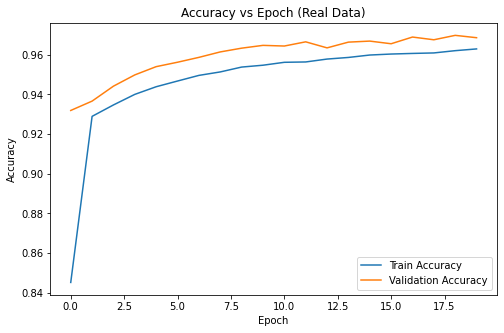

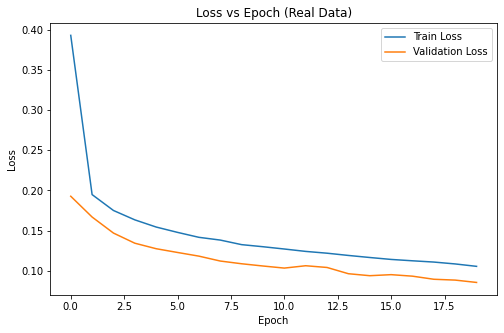

In [62]:
# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epoch (Real Data)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epoch (Real Data)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.show()


In [55]:
model.save("real_cnn_model.h5")

> # **BALANCED DATASET**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Epoch 1/20
3368/3368 [==============================] - 11s 3ms/step - loss: 0.3930 - accuracy: 0.8452 - val_loss: 0.1927 - val_accuracy: 0.9319
Epoch 2/20
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1947 - accuracy: 0.9289 - val_loss: 0.1668 - val_accuracy: 0.9366
Epoch 3/20
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1749 - accuracy: 0.9347 - val_loss: 0.1468 - val_accuracy: 0.9442
Epoch 4/20
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1633 - accuracy: 0.9400 - val_loss: 0.1342 - val_accuracy: 0.9498
Epoch 5/20
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1543 - accuracy: 0.9439 - val_loss: 0.1273 - val_accuracy: 0.9540
Epoch 6/20
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1477 - accuracy: 0.9468 - val_loss: 0.1227 - val_accuracy: 0.9562
Epoch 7/20
3368/3368 [==============================] - 11s 3ms/step - loss: 0.1415 - accuracy: 0.9496 - val_loss: 0.1181 - val_ac

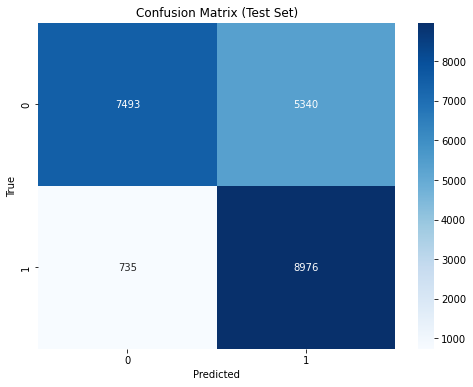

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load balanced training data ---
train_path = "/kaggle/input/wcgan-nsl-kdd/train_balanced.csv"
train_df = pd.read_csv(train_path)

X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

# Clean NaNs/Infs
X_train = np.nan_to_num(X_train)

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# Normalize features on training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Reshape for Conv1D: (samples, features, 1)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

num_features = X_train_reshaped.shape[1]
num_classes = len(le.classes_)

# --- Load and preprocess test data ---
test_path = "/kaggle/input/wcgan-nsl-kdd/test_processed.csv"
test_df = pd.read_csv(test_path)

X_test = test_df.drop('label', axis=1)
y_test = test_df['label'].values

# Handle missing columns in test that are in train
missing_cols = [col for col in train_df.columns if col not in X_test.columns and col != 'label']
for col in missing_cols:
    X_test[col] = 0

# Align columns order to training features
X_test = X_test[train_df.drop('label', axis=1).columns]

# Convert to numpy and clean NaNs/Infs
X_test = np.nan_to_num(X_test.values)

# Encode test labels with the same LabelEncoder
y_test_enc = le.transform(y_test)

# Normalize test data with scaler fitted on train data
X_test_scaled = scaler.transform(X_test)

# Reshape for Conv1D
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# --- Build the CNN model ---
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(num_features, 1)),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.3),

    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Train ---
history = model.fit(X_train_reshaped, y_train_enc, epochs=20, batch_size=32, validation_split=0.2)

# --- Evaluate ---
train_loss, train_acc = model.evaluate(X_train_reshaped, y_train_enc, verbose=0)
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_enc, verbose=0)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

# --- Predictions and report ---
y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test_enc, y_pred_classes, target_names=[str(c) for c in le.classes_]))


# --- Confusion Matrix ---
cm = confusion_matrix(y_test_enc, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


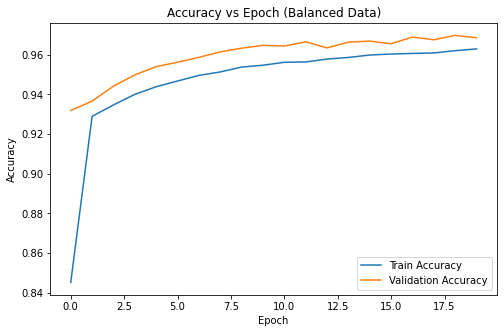

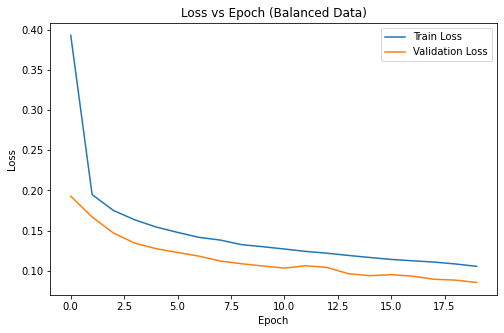

In [60]:
# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epoch (Balanced Data)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epoch (Balanced Data)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [54]:
# Save the entire model to a file
model.save("balanced_cnn_model.h5")

# **ACGAN**

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Load train, test, and synthetic datasets (if any)
train_df = pd.read_csv("/kaggle/input/acgan-nsl-kdd/train_cleaned.csv")
test_df = pd.read_csv("/kaggle/input/acgan-nsl-kdd/test_cleaned.csv")

# Example synthetic normal data (if available)
# synthetic_df = pd.read_csv("/kaggle/input/acgan-nsl-kdd/synthetic_normal.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
# print("Synthetic shape:", synthetic_df.shape)  # Uncomment if synthetic data used


Train shape: (125973, 115)
Test shape: (22544, 112)


In [42]:
# Drop rows with NaN labels in train set
train_df = train_df.dropna(subset=["label"])

# Optionally combine synthetic data with train data
# Uncomment if synthetic data exists and you want to combine
# train_df = pd.concat([train_df, synthetic_df], axis=0).reset_index(drop=True)


In [43]:
# Separate features and labels for train and test
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

# Align test columns with train columns (add missing cols as 0)
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]  # reorder test columns to train order


In [44]:
# Initialize label encoder and fit only on train labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# Remove test samples with labels not in train label classes (if any)
mask_test = y_test.isin(le.classes_)
X_test = X_test[mask_test]
y_test = y_test[mask_test]

y_test_enc = le.transform(y_test)

# One-hot encode labels
num_classes = len(le.classes_)
y_train_oh = to_categorical(y_train_enc, num_classes=num_classes)
y_test_oh = to_categorical(y_test_enc, num_classes=num_classes)

print("Classes:", le.classes_)
print("Number of classes:", num_classes)
print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Classes: [0. 1.]
Number of classes: 2
Train samples: 125972
Test samples: 22544


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
input_dim = X_train_scaled.shape[1]

model = models.Sequential([
    layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
    layers.Conv1D(32, 3, activation='relu'),
    layers.Conv1D(64, 3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 114, 1)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 112, 32)           128       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 110, 64)           6208      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

> # **Train for Real data**

In [47]:
history = model.fit(
    X_train_scaled, y_train_oh,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/20
788/788 - 3s - loss: 0.1991 - accuracy: 0.9270 - val_loss: 0.1003 - val_accuracy: 0.9631
Epoch 2/20
788/788 - 2s - loss: 0.0878 - accuracy: 0.9692 - val_loss: 0.0667 - val_accuracy: 0.9722
Epoch 3/20
788/788 - 2s - loss: 0.0627 - accuracy: 0.9778 - val_loss: 0.0554 - val_accuracy: 0.9769
Epoch 4/20
788/788 - 2s - loss: 0.0505 - accuracy: 0.9827 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 5/20
788/788 - 2s - loss: 0.0460 - accuracy: 0.9846 - val_loss: 0.0349 - val_accuracy: 0.9892
Epoch 6/20
788/788 - 2s - loss: 0.0422 - accuracy: 0.9860 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 7/20
788/788 - 2s - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0264 - val_accuracy: 0.9916
Epoch 8/20
788/788 - 2s - loss: 0.0358 - accuracy: 0.9880 - val_loss: 0.0269 - val_accuracy: 0.9902
Epoch 9/20
788/788 - 2s - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0231 - val_accuracy: 0.9922
Epoch 10/20
788/788 - 2s - loss: 0.0330 - accuracy: 0.9888 - val_loss: 0.0356 - val_accuracy: 0.9868

In [48]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_oh, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 78.17%


Train Accuracy: 95.32%
Test Accuracy: 70.03%
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.93      0.51      0.66     12833
         1.0       0.60      0.95      0.73      9711

    accuracy                           0.70     22544
   macro avg       0.76      0.73      0.70     22544
weighted avg       0.79      0.70      0.69     22544



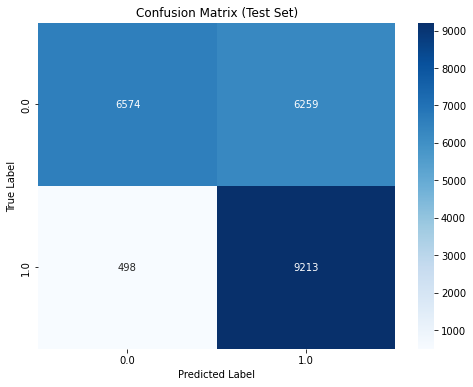

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# After model training and evaluation preparations:
# X_train_reshaped, X_test_reshaped: your features
# y_train_enc, y_test_enc: your labels (encoded integers)
# model: your trained keras model
# le: your label encoder used for decoding classes

# Evaluate on train and test data
train_loss, train_acc = model.evaluate(X_train_reshaped, y_train_enc, verbose=0)
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_enc, verbose=0)

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict on test set (probabilities)
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get labels present in test set and predictions
labels_in_test = unique_labels(y_test_enc, y_pred_classes)

# Get string names of labels (decode using your label encoder)
target_names_in_test = [str(le.classes_[i]) for i in labels_in_test]

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test_enc, y_pred_classes, labels=labels_in_test, target_names=target_names_in_test))

# Confusion matrix
cm = confusion_matrix(y_test_enc, y_pred_classes)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_in_test,
            yticklabels=target_names_in_test)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


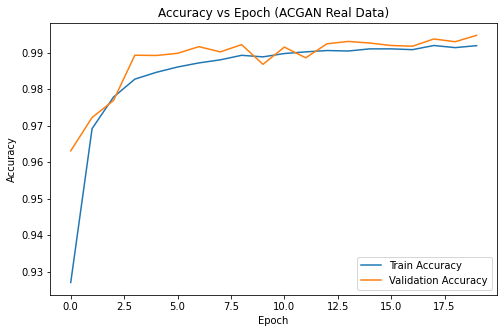

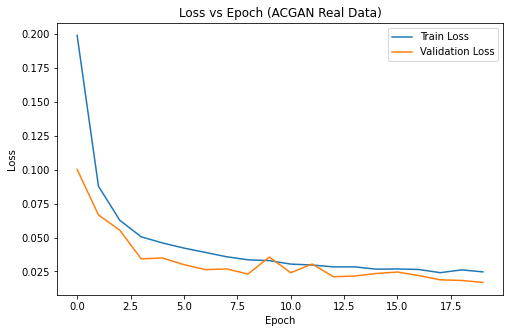

In [61]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epoch (ACGAN Real Data)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epoch (ACGAN Real Data)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.show()


In [62]:
model.save('acgan_real_data_model.h5')

# **Balanced data**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [71]:
# Load real training data
train_real = pd.read_csv('/kaggle/input/acgan-nsl-kdd/train_cleaned.csv')

# Load synthetic normal data
synthetic_normal = pd.read_csv('/kaggle/input/acgan-nsl-kdd/synthetic_data_normal2.csv')

# Load real test data
test_df = pd.read_csv('/kaggle/input/acgan-nsl-kdd/test_cleaned.csv')

# Check columns match for concatenation
print("Columns train_real:", train_real.columns)
print("Columns synthetic_normal:", synthetic_normal.columns)

# Combine real train + synthetic normal data (assuming columns exactly same)
train_combined = pd.concat([train_real, synthetic_normal], ignore_index=True)

print(f"Combined training data shape: {train_combined.shape}")
print(f"Test data shape: {test_df.shape}")


Columns train_real: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'label'],
      dtype='object', length=115)
Columns synthetic_normal: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'label'],
      dtype='object', length=123)
Combined training data shape: (134686, 123)
Test data shape: (22544, 112)


In [72]:
X_train = train_combined.drop(columns=['label']).values
y_train = train_combined['label'].values

X_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

# Check for NaNs/Infs and replace if any
print("NaNs in X_train:", np.isnan(X_train).sum())
print("Infs in X_train:", np.isinf(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("Infs in X_test:", np.isinf(X_test).sum())

# Replace NaN/Inf with zeros (or any other strategy you prefer)
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)


NaNs in X_train: 1007784
Infs in X_train: 0
NaNs in X_test: 0
Infs in X_test: 0


In [73]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train_enc, num_classes)
y_test_cat = to_categorical(y_test_enc, num_classes)


In [76]:
# Align columns to keep common features only
train_cols = set(train_combined.columns)
test_cols = set(test_df.columns)

common_cols = list(train_cols.intersection(test_cols))
if 'label' in common_cols:
    common_cols.remove('label')  # features only

print(f"Number of common features: {len(common_cols)}")

X_train = train_combined[common_cols].values
y_train = train_combined['label'].values

X_test = test_df[common_cols].values
y_test = test_df['label'].values

# Check NaN/Infs
print("NaNs in X_train:", np.isnan(X_train).sum())
print("Infs in X_train:", np.isinf(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("Infs in X_test:", np.isinf(X_test).sum())

X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


Number of common features: 111
NaNs in X_train: 503892
Infs in X_train: 0
NaNs in X_test: 0
Infs in X_test: 0


In [77]:
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 109, 64)           256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 54, 64)            0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 54, 64)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 52, 32)            6176      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 26, 32)            0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 26, 32)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 832)              

In [78]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = model.fit(
    X_train_reshaped, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/50
1684/1684 - 5s - loss: 0.0959 - accuracy: 0.9674 - val_loss: 0.0378 - val_accuracy: 0.9863
Epoch 2/50
1684/1684 - 5s - loss: 0.0576 - accuracy: 0.9794 - val_loss: 0.0310 - val_accuracy: 0.9923
Epoch 3/50
1684/1684 - 5s - loss: 0.0463 - accuracy: 0.9835 - val_loss: 0.0198 - val_accuracy: 0.9925
Epoch 4/50
1684/1684 - 5s - loss: 0.0367 - accuracy: 0.9871 - val_loss: 0.0150 - val_accuracy: 0.9954
Epoch 5/50
1684/1684 - 5s - loss: 0.0333 - accuracy: 0.9883 - val_loss: 0.0163 - val_accuracy: 0.9958
Epoch 6/50
1684/1684 - 5s - loss: 0.0311 - accuracy: 0.9893 - val_loss: 0.0170 - val_accuracy: 0.9960
Epoch 7/50
1684/1684 - 5s - loss: 0.0292 - accuracy: 0.9898 - val_loss: 0.0152 - val_accuracy: 0.9951
Epoch 8/50
1684/1684 - 5s - loss: 0.0285 - accuracy: 0.9899 - val_loss: 0.0154 - val_accuracy: 0.9959
Epoch 9/50
1684/1684 - 5s - loss: 0.0278 - accuracy: 0.9903 - val_loss: 0.0163 - val_accuracy: 0.9956
Restoring model weights from the end of the best epoch.
Epoch 00009: early stoppin

In [82]:
from tensorflow.keras.utils import to_categorical

num_classes = 3  # change to your actual number of classes

# Convert y_test_enc to one-hot encoded if needed
if len(y_test_enc.shape) == 1 or y_test_enc.shape[1] == 1:
    y_test_onehot = to_categorical(y_test_enc, num_classes=num_classes)
else:
    y_test_onehot = y_test_enc

# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_onehot, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Loss: 1.1067
Test Accuracy: 80.09%


Train Accuracy: 99.33%
Test Accuracy: 80.09%

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     12833
           1       0.69      0.97      0.81      9711

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544



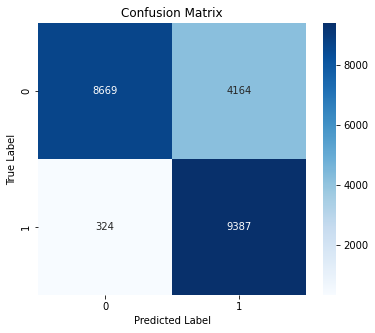

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Convert integer labels to one-hot if needed
if len(y_train_enc.shape) == 1 or y_train_enc.shape[1] == 1:
    y_train_onehot = to_categorical(y_train_enc, num_classes=3)  # update num_classes accordingly
else:
    y_train_onehot = y_train_enc

if len(y_test_enc.shape) == 1 or y_test_enc.shape[1] == 1:
    y_test_onehot = to_categorical(y_test_enc, num_classes=3)
else:
    y_test_onehot = y_test_enc

# Evaluate train accuracy
train_loss, train_acc = model.evaluate(X_train_reshaped, y_train_onehot, verbose=0)
print(f"Train Accuracy: {train_acc*100:.2f}%")

# Evaluate test accuracy
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_onehot, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%\n")

# Predict class probabilities for test set
y_pred_prob = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels from one-hot
y_true = np.argmax(y_test_onehot, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


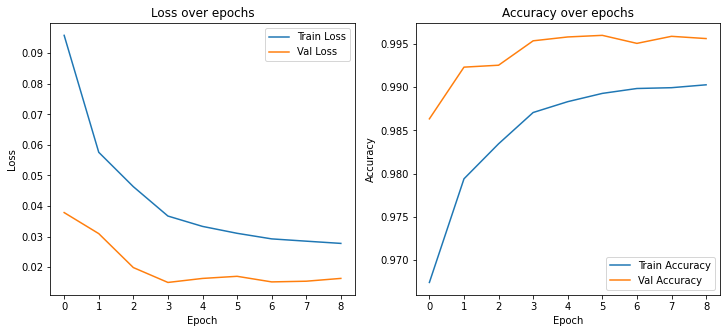

In [84]:
# Assuming your history object is named 'history' (returned by model.fit)

plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


> # ***another balanced code ***

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')


In [20]:
train_df = pd.read_csv('/kaggle/input/acgan-nsl-kdd/train_cleaned.csv')
synthetic_df = pd.read_csv('/kaggle/input/acgan-nsl-kdd/synthetic_data_normal2.csv')
test_df = pd.read_csv('/kaggle/input/acgan-nsl-kdd/test_cleaned.csv')

# Combine real train + synthetic normal for balanced training
train_balanced_df = pd.concat([train_df, synthetic_df], ignore_index=True)

# Check for NaNs or infinite values in train_balanced_df
print("NaNs in train_balanced_df:", train_balanced_df.isnull().sum().sum())
print("NaNs in test_df:", test_df.isnull().sum().sum())

# Fill or drop NaNs if any (better to fill with 0 or median)
train_balanced_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# Separate features and labels
X_train = train_balanced_df.drop('label', axis=1)
y_train = train_balanced_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Fix missing columns in test to match train features if any
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0

# Reorder test columns same as train
X_test = X_test[X_train.columns]

# Convert to numpy and check for any NaN or inf again
X_train = X_train.values
X_test = X_test.values

print("Any NaNs in X_train?", np.isnan(X_train).any())
print("Any NaNs in X_test?", np.isnan(X_test).any())
print("Any infinite in X_train?", np.isinf(X_train).any())
print("Any infinite in X_test?", np.isinf(X_test).any())


NaNs in train_balanced_df: 1007785
NaNs in test_df: 0
Any NaNs in X_train? False
Any NaNs in X_test? False
Any infinite in X_train? False
Any infinite in X_test? False


In [21]:
# Encode labels to integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Normalize features using MinMaxScaler to [0,1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling check min/max ranges to ensure no invalid values
print("X_train_scaled min/max:", X_train_scaled.min(), X_train_scaled.max())
print("X_test_scaled min/max:", X_test_scaled.min(), X_test_scaled.max())

# Reshape for Conv1D input: (samples, features, 1)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(f"Train shape: {X_train_reshaped.shape}, Test shape: {X_test_reshaped.shape}")
print(f"Number of classes: {len(le.classes_)}")


X_train_scaled min/max: 0.0 1.0
X_test_scaled min/max: 0.0 1.018172236255464
Train shape: (134686, 122, 1), Test shape: (22544, 122, 1)
Number of classes: 2


In [22]:
num_classes = len(le.classes_)

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 120, 64)           256       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 60, 64)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 58, 128)           24704     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 29, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 29, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3712)             

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True, verbose=1)

history = model.fit(X_train_reshaped, y_train_enc,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stop],
                    verbose=2)


Epoch 1/20
1895/1895 - 5s - loss: 0.0795 - accuracy: 0.9722 - val_loss: 0.0667 - val_accuracy: 0.9836
Epoch 2/20
1895/1895 - 5s - loss: 0.0537 - accuracy: 0.9810 - val_loss: 0.0903 - val_accuracy: 0.9664
Epoch 3/20
1895/1895 - 5s - loss: 0.0417 - accuracy: 0.9847 - val_loss: 0.0625 - val_accuracy: 0.9840
Epoch 4/20
1895/1895 - 5s - loss: 0.0295 - accuracy: 0.9892 - val_loss: 0.0523 - val_accuracy: 0.9850
Epoch 5/20
1895/1895 - 5s - loss: 0.0256 - accuracy: 0.9905 - val_loss: 0.0249 - val_accuracy: 0.9924
Epoch 6/20
1895/1895 - 5s - loss: 0.0230 - accuracy: 0.9916 - val_loss: 0.0500 - val_accuracy: 0.9817
Epoch 7/20
1895/1895 - 5s - loss: 0.0225 - accuracy: 0.9916 - val_loss: 0.0633 - val_accuracy: 0.9788
Epoch 8/20
1895/1895 - 5s - loss: 0.0212 - accuracy: 0.9923 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 9/20
1895/1895 - 5s - loss: 0.0202 - accuracy: 0.9927 - val_loss: 0.1214 - val_accuracy: 0.9654
Epoch 10/20
1895/1895 - 5s - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0282 - 

Train Accuracy: 98.72%
Test Accuracy: 79.52%
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.79     12833
         1.0       0.70      0.93      0.80      9711

    accuracy                           0.80     22544
   macro avg       0.81      0.81      0.80     22544
weighted avg       0.83      0.80      0.80     22544



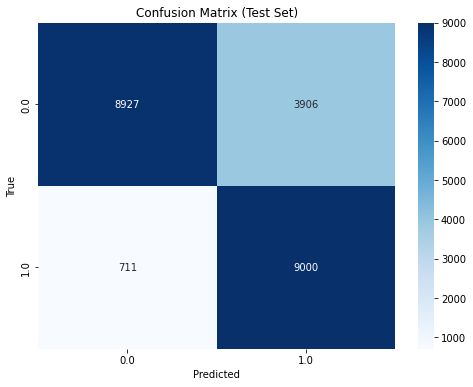

In [24]:
train_loss, train_acc = model.evaluate(X_train_reshaped, y_train_enc, verbose=0)
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_enc, verbose=0)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

labels_in_test = unique_labels(y_test_enc, y_pred_classes)
target_names_in_test = [str(le.classes_[i]) for i in labels_in_test]

print("Classification Report (Test):")
print(classification_report(y_test_enc, y_pred_classes, labels=labels_in_test, target_names=target_names_in_test))

cm = confusion_matrix(y_test_enc, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_in_test, yticklabels=target_names_in_test)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# **UNSW_NB15 DATASET**

# **WCGAN (UNSW-NB15)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
# Imbalanced dataset
df_train = pd.read_csv('/kaggle/input/wcganunsw-nb15/train_processed.csv')
df_test = pd.read_csv('/kaggle/input/wcganunsw-nb15/test_processed.csv')

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)


Train shape: (82332, 43)
Test shape: (175341, 43)


In [3]:
# Split features and labels
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# One-hot encode labels
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Reshape for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [4]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            256       
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               327808    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 328,322
Trainable params: 328,322
Non-trainable params: 0
__________________________________________________

In [5]:
history = model.fit(X_train_reshaped, y_train_cat, epochs=20, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/20
515/515 [==============================] - 9s 3ms/step - loss: 0.1089 - accuracy: 0.9602 - val_loss: 1.2618 - val_accuracy: 0.4866
Epoch 2/20
515/515 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9691 - val_loss: 0.9614 - val_accuracy: 0.5318
Epoch 3/20
515/515 [==============================] - 1s 3ms/step - loss: 0.0653 - accuracy: 0.9732 - val_loss: 1.0026 - val_accuracy: 0.5977
Epoch 4/20
515/515 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9749 - val_loss: 1.0686 - val_accuracy: 0.5718
Epoch 5/20
515/515 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9762 - val_loss: 0.8097 - val_accuracy: 0.6753
Epoch 6/20
515/515 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9773 - val_loss: 0.9894 - val_accuracy: 0.6444
Epoch 7/20
515/515 [==============================] - 1s 3ms/step - loss: 0.0555 - accuracy: 0.9777 - val_loss: 0.8382 - val_accuracy: 0.6854
Epoch 

Train Accuracy: 93.96%
Test Accuracy: 91.92%

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     56000
           1       0.97      0.91      0.94    119341

    accuracy                           0.92    175341
   macro avg       0.90      0.92      0.91    175341
weighted avg       0.93      0.92      0.92    175341



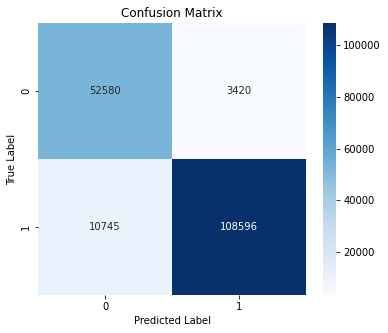

In [6]:
# Train accuracy
train_loss, train_acc = model.evaluate(X_train_reshaped, y_train_cat, verbose=0)
print(f"Train Accuracy: {train_acc*100:.2f}%")

# Test accuracy
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%\n")

# Predictions
y_pred_prob = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

# If labels are one-hot encoded
y_true = np.argmax(y_test_cat, axis=1)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


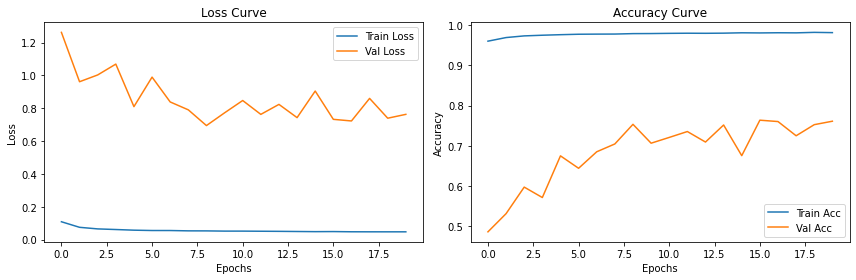

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**OPTIONAL**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical


In [9]:
# Load UNSW dataset (real, imbalanced)
train_df = pd.read_csv('/kaggle/input/wcganunsw-nb15/train_processed.csv')
test_df = pd.read_csv('/kaggle/input/wcganunsw-nb15/test_processed.csv')

# Separate features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN [samples, timesteps, features]
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Encode labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))


In [10]:
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 20, 32)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 18, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 64)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [11]:
history = model.fit(X_train_cnn, y_train_enc, 
                    validation_data=(X_test_cnn, y_test_enc),
                    epochs=15, batch_size=64)


Epoch 1/15
1287/1287 [==============================] - 8s 6ms/step - loss: 0.2637 - accuracy: 0.8814 - val_loss: 0.2535 - val_accuracy: 0.8831
Epoch 2/15
1287/1287 [==============================] - 8s 6ms/step - loss: 0.1735 - accuracy: 0.9286 - val_loss: 0.3098 - val_accuracy: 0.8741
Epoch 3/15
1287/1287 [==============================] - 8s 6ms/step - loss: 0.1526 - accuracy: 0.9381 - val_loss: 0.2848 - val_accuracy: 0.8883
Epoch 4/15
1287/1287 [==============================] - 7s 6ms/step - loss: 0.1439 - accuracy: 0.9418 - val_loss: 0.2904 - val_accuracy: 0.8872
Epoch 5/15
1287/1287 [==============================] - 7s 6ms/step - loss: 0.1374 - accuracy: 0.9447 - val_loss: 0.2869 - val_accuracy: 0.8879
Epoch 6/15
1287/1287 [==============================] - 7s 6ms/step - loss: 0.1331 - accuracy: 0.9464 - val_loss: 0.2798 - val_accuracy: 0.8817
Epoch 7/15
1287/1287 [==============================] - 8s 6ms/step - loss: 0.1284 - accuracy: 0.9483 - val_loss: 0.2620 - val_accuracy:

Train Accuracy: 96.32%
Test Accuracy: 88.58%

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.98      0.85     56000
           1       0.99      0.84      0.91    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341



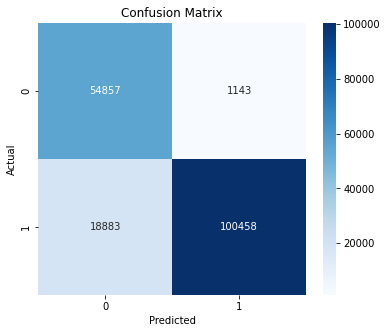

In [12]:
# Train accuracy
train_loss, train_acc = model.evaluate(X_train_cnn, y_train_enc, verbose=0)
print(f"Train Accuracy: {train_acc*100:.2f}%")

# Test accuracy
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_enc, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%\n")

# Predict
y_pred_prob = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


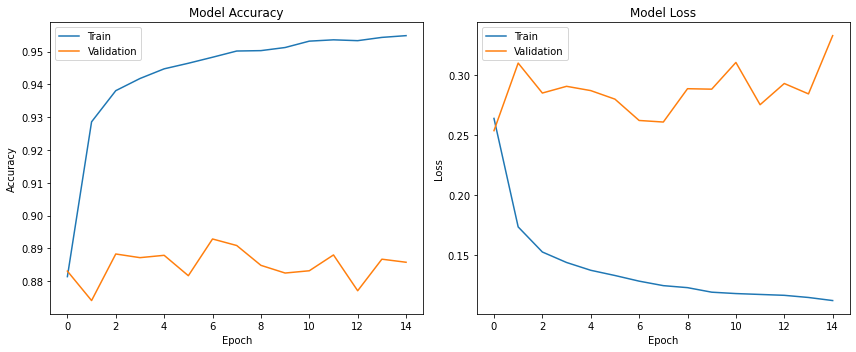

In [13]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **For Balanced Data**

Epoch 1/20
1134/1134 [==============================] - 3s 3ms/step - loss: 0.2520 - accuracy: 0.8828 - val_loss: 0.1725 - val_accuracy: 0.9259
Epoch 2/20
1134/1134 [==============================] - 3s 3ms/step - loss: 0.1747 - accuracy: 0.9242 - val_loss: 0.1403 - val_accuracy: 0.9414
Epoch 3/20
1134/1134 [==============================] - 3s 3ms/step - loss: 0.1527 - accuracy: 0.9362 - val_loss: 0.1331 - val_accuracy: 0.9462
Epoch 4/20
1134/1134 [==============================] - 3s 3ms/step - loss: 0.1424 - accuracy: 0.9409 - val_loss: 0.1199 - val_accuracy: 0.9530
Epoch 5/20
1134/1134 [==============================] - 3s 3ms/step - loss: 0.1333 - accuracy: 0.9448 - val_loss: 0.1180 - val_accuracy: 0.9553
Epoch 6/20
1134/1134 [==============================] - 3s 3ms/step - loss: 0.1276 - accuracy: 0.9475 - val_loss: 0.1124 - val_accuracy: 0.9549
Epoch 7/20
1134/1134 [==============================] - 3s 3ms/step - loss: 0.1243 - accuracy: 0.9488 - val_loss: 0.1076 - val_accuracy:

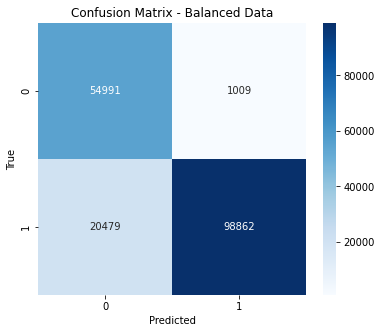

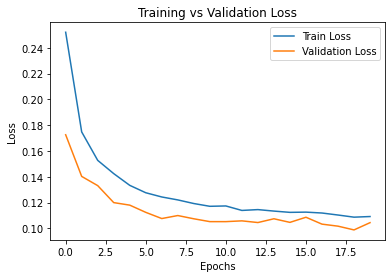

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load balanced training and test data
train_balanced = pd.read_csv('/kaggle/input/wcganunsw-nb15/train_balanced.csv')
test_df = pd.read_csv('/kaggle/input/wcganunsw-nb15/test_processed.csv')

# Separate features and labels
X_train = train_balanced.drop('label', axis=1)
y_train = train_balanced['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))

# Reshape input for CNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build CNN model (Version 1)
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_enc.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train_enc, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate
train_loss, train_acc = model.evaluate(X_train_cnn, y_train_enc, verbose=0)
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_enc, verbose=0)

print(f"\nTrain Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%\n")

# Classification report
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Balanced Data')
plt.show()

# Plot Loss Curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


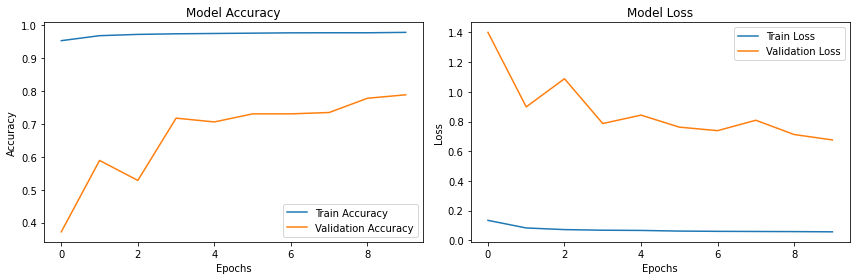

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **ACGAN (UNSW-NB15)**

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Load imbalanced training and testing data
train_df = pd.read_csv("/kaggle/input/acgan-unsw-nb15/train_processed.csv")
test_df = pd.read_csv("/kaggle/input/acgan-unsw-nb15/test_processed.csv")

# Separate features and labels
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# One-hot encode
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1338 - accuracy: 0.9528 - val_loss: 1.4007 - val_accuracy: 0.3723
Epoch 2/10
1030/1030 [==============================] - 3s 3ms/step - loss: 0.0824 - accuracy: 0.9680 - val_loss: 0.8984 - val_accuracy: 0.5891
Epoch 3/10
1030/1030 [==============================] - 3s 3ms/step - loss: 0.0715 - accuracy: 0.9719 - val_loss: 1.0883 - val_accuracy: 0.5284
Epoch 4/10
1030/1030 [==============================] - 3s 3ms/step - loss: 0.0673 - accuracy: 0.9737 - val_loss: 0.7863 - val_accuracy: 0.7175
Epoch 5/10
1030/1030 [==============================] - 3s 3ms/step - loss: 0.0659 - accuracy: 0.9747 - val_loss: 0.8430 - val_accuracy: 0.7060
Epoch 6/10
1030/1030 [==============================] - 3s 3ms/step - loss: 0.0615 - accuracy: 0.9756 - val_loss: 0.7620 - val_accuracy: 0.7305
Epoch 7/10
1030/1030 [==============================] - 3s 3ms/step - loss: 0.0597 - accuracy: 0.9766 - val_loss: 0.7383 - val_accuracy:

Train Accuracy: 94.27%
Test Accuracy: 91.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     56000
           1       0.97      0.90      0.93    119341

    accuracy                           0.91    175341
   macro avg       0.89      0.92      0.90    175341
weighted avg       0.92      0.91      0.92    175341



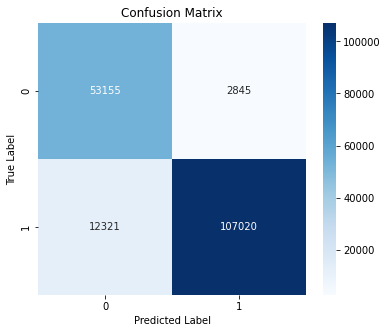

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train Accuracy
train_loss, train_acc = model.evaluate(X_train_cnn, y_train_cat, verbose=0)
print(f"Train Accuracy: {train_acc * 100:.2f}%")

# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%\n")

# Predictions
y_pred_prob = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


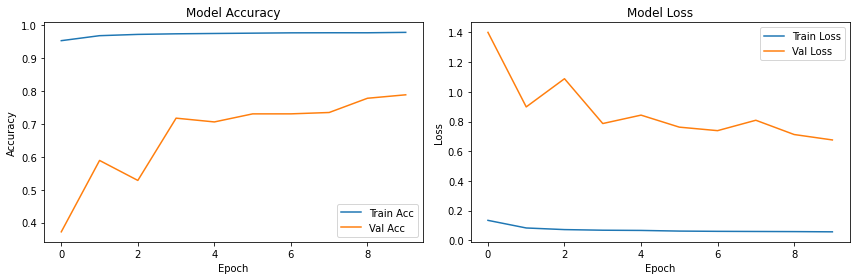

In [18]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
model.save("cnn_acgan_unsw_imbalanced.h5")


# **For Balanced Data**

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Load original imbalanced train and test data
train_df = pd.read_csv("/kaggle/input/acgan-unsw-nb15/train_processed.csv")
test_df = pd.read_csv("/kaggle/input/acgan-unsw-nb15/test_processed.csv")

# Load synthetic normal samples from ACGAN
acgan_normal_df = pd.read_csv("/kaggle/input/acgan-unsw-nb15/acgan_normal.csv")

# Combine original training data (which mostly contains attacks) + synthetic normal data
balanced_train_df = pd.concat([train_df, acgan_normal_df], axis=0).reset_index(drop=True)

# Shuffle the balanced training data
balanced_train_df = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X_train_bal = balanced_train_df.drop("label", axis=1)
y_train_bal = balanced_train_df["label"]
X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

# Standardize (fit on balanced train, transform train and test)
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN
X_train_bal_cnn = X_train_bal_scaled.reshape(-1, X_train_bal_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# Encode labels
le = LabelEncoder()
y_train_bal_enc = le.fit_transform(y_train_bal)
y_test_enc = le.transform(y_test)

# One-hot encode
y_train_bal_cat = to_categorical(y_train_bal_enc)
y_test_cat = to_categorical(y_test_enc)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_bal = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_bal_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model_bal.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_bal = model_bal.fit(X_train_bal_cnn, y_train_bal_cat, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
1134/1134 [==============================] - 4s 3ms/step - loss: 0.2382 - accuracy: 0.8962 - val_loss: 0.1376 - val_accuracy: 0.9431
Epoch 2/10
1134/1134 [==============================] - 4s 3ms/step - loss: 0.1524 - accuracy: 0.9386 - val_loss: 0.1132 - val_accuracy: 0.9533
Epoch 3/10
1134/1134 [==============================] - 4s 3ms/step - loss: 0.1333 - accuracy: 0.9473 - val_loss: 0.1029 - val_accuracy: 0.9600
Epoch 4/10
1134/1134 [==============================] - 4s 3ms/step - loss: 0.1211 - accuracy: 0.9521 - val_loss: 0.0972 - val_accuracy: 0.9602
Epoch 5/10
1134/1134 [==============================] - 4s 3ms/step - loss: 0.1168 - accuracy: 0.9539 - val_loss: 0.0930 - val_accuracy: 0.9636
Epoch 6/10
1134/1134 [==============================] - 4s 3ms/step - loss: 0.1101 - accuracy: 0.9556 - val_loss: 0.0923 - val_accuracy: 0.9619
Epoch 7/10
1134/1134 [==============================] - 4s 3ms/step - loss: 0.1109 - accuracy: 0.9563 - val_loss: 0.0885 - val_accuracy:

Balanced Train Accuracy: 96.51%
Balanced Test Accuracy: 88.45%

Balanced Data - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     56000
           1       0.99      0.84      0.91    119341

    accuracy                           0.88    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.88      0.89    175341



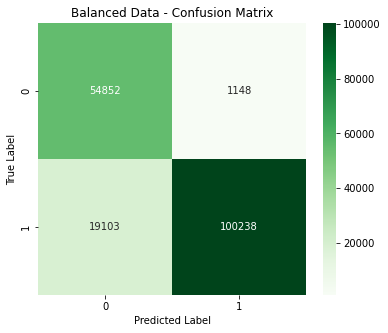

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train Accuracy
train_loss, train_acc = model_bal.evaluate(X_train_bal_cnn, y_train_bal_cat, verbose=0)
print(f"Balanced Train Accuracy: {train_acc * 100:.2f}%")

# Test Accuracy
test_loss, test_acc = model_bal.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"Balanced Test Accuracy: {test_acc * 100:.2f}%\n")

# Predictions
y_pred_prob = model_bal.predict(X_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification Report
print("Balanced Data - Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Balanced Data - Confusion Matrix")
plt.show()


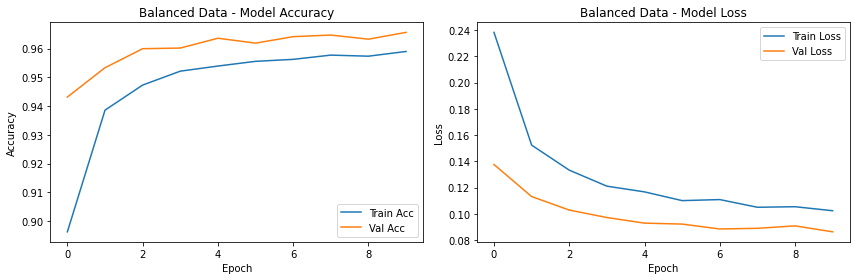

In [23]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bal.history['accuracy'], label='Train Acc')
plt.plot(history_bal.history['val_accuracy'], label='Val Acc')
plt.title('Balanced Data - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_bal.history['loss'], label='Train Loss')
plt.plot(history_bal.history['val_loss'], label='Val Loss')
plt.title('Balanced Data - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
model_bal.save("cnn_acgan_unsw_balanced.h5")


# **GRAPHS**

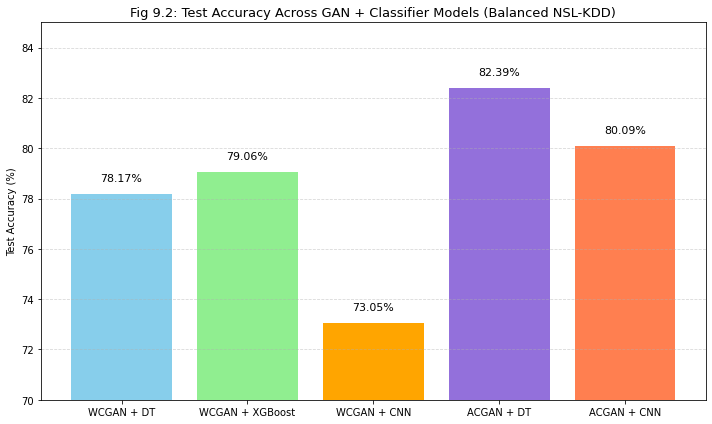

In [2]:
import matplotlib.pyplot as plt

# Data: Test Accuracy on Balanced Dataset
models = [
    "WCGAN + DT", 
    "WCGAN + XGBoost", 
    "WCGAN + CNN", 
    "ACGAN + DT", 
    "ACGAN + CNN"
]
accuracies = [78.17, 79.06, 73.05, 82.39, 80.09]  # From your results

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=["skyblue", "lightgreen", "orange", "mediumpurple", "coral"])
plt.ylim(70, 85)

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}%", ha='center', fontsize=11)

plt.title("Fig 9.2: Test Accuracy Across GAN + Classifier Models (Balanced NSL-KDD)", fontsize=13)
plt.ylabel("Test Accuracy (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

# Save to outputs folder
import os
os.makedirs("outputs/plots", exist_ok=True)
plt.savefig("outputs/plots/fig9_2_test_accuracy_balanced.png", dpi=300)
plt.show()


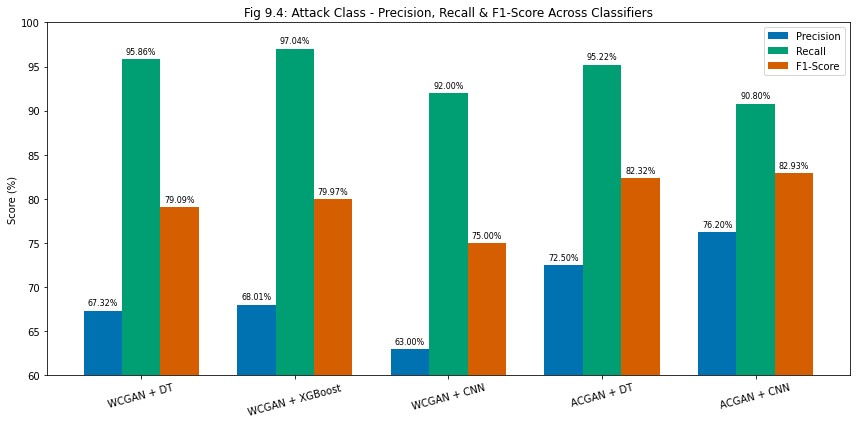

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['WCGAN + DT', 'WCGAN + XGBoost', 'WCGAN + CNN', 'ACGAN + DT', 'ACGAN + CNN']

# Metrics for "Attack" class (in %)
precision = [67.32, 68.01, 63.0, 72.50, 76.2]
recall    = [95.86, 97.04, 92.0, 95.22, 90.8]
f1_score  = [79.09, 79.97, 75.0, 82.32, 82.93]

x = np.arange(len(models))  # label locations
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision', color='#0072B2')
bars2 = ax.bar(x, recall, width, label='Recall', color='#009E73')
bars3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='#D55E00')

# Add values on top
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Score (%)')
ax.set_title('Fig 9.4: Attack Class - Precision, Recall & F1-Score Across Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(60, 100)
ax.legend()

plt.tight_layout()
plt.savefig("outputs/plots/fig9_4_metrics_comparison_attack.png", bbox_inches="tight")
plt.show()


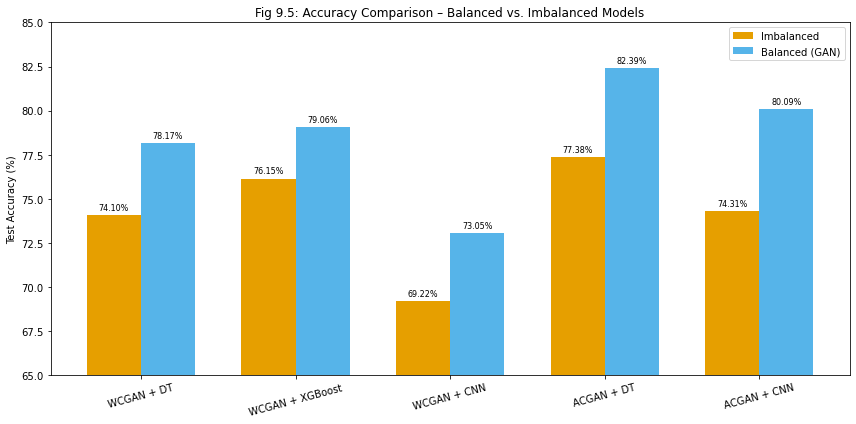

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier combinations
models = ['WCGAN + DT', 'WCGAN + XGBoost', 'WCGAN + CNN', 'ACGAN + DT', 'ACGAN + CNN']

# Test accuracies (%)
imbalanced_acc = [74.10, 76.15, 69.22, 77.38, 74.31]
balanced_acc =   [78.17, 79.06, 73.05, 82.39, 80.09]

x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, imbalanced_acc, width, label='Imbalanced', color='#E69F00')
bars2 = ax.bar(x + width/2, balanced_acc, width, label='Balanced (GAN)', color='#56B4E9')

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Fig 9.5: Accuracy Comparison – Balanced vs. Imbalanced Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(65, 85)
ax.legend()

plt.tight_layout()
plt.savefig("outputs/plots/fig9_5_accuracy_bal_vs_imbal.png", bbox_inches="tight")
plt.show()


# *GRAPHS 2*

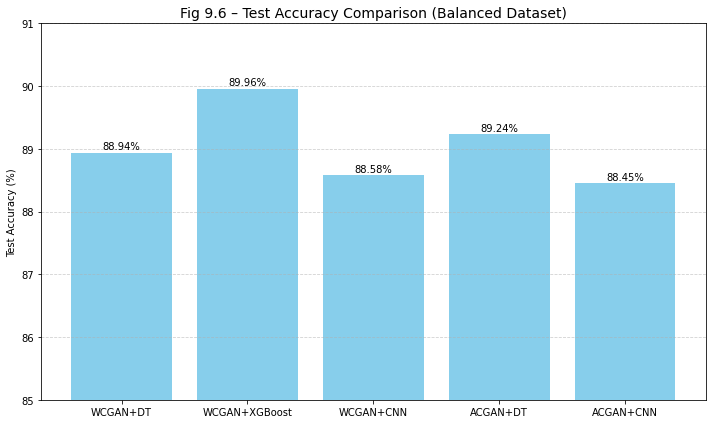

In [5]:
import matplotlib.pyplot as plt

models = ['WCGAN+DT', 'WCGAN+XGBoost', 'WCGAN+CNN', 'ACGAN+DT', 'ACGAN+CNN']
test_accuracies = [88.94, 89.96, 88.58, 89.24, 88.45]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, test_accuracies, color='skyblue')
plt.title('Fig 9.6 – Test Accuracy Comparison (Balanced Dataset)', fontsize=14)
plt.ylabel('Test Accuracy (%)')
plt.ylim(85, 91)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


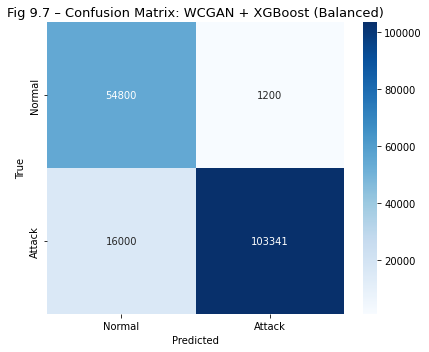

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample dummy values
true_labels = [0]*56000 + [1]*119341
predicted_labels = [0]*54800 + [1]*1200 + [0]*16000 + [1]*103341  # Adjust to match your real prediction

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Fig 9.7 – Confusion Matrix: WCGAN + XGBoost (Balanced)', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


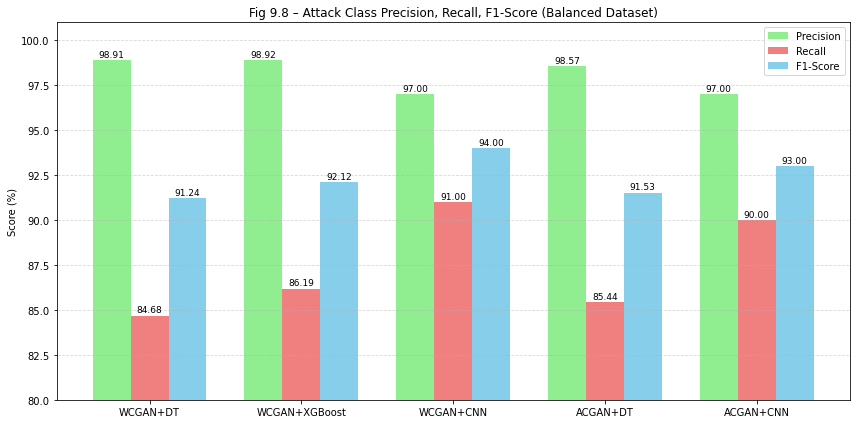

In [9]:
import numpy as np
import matplotlib.pyplot as plt

models = ['WCGAN+DT', 'WCGAN+XGBoost', 'WCGAN+CNN', 'ACGAN+DT', 'ACGAN+CNN']
precision = [98.91, 98.92, 97.00, 98.57, 97.00]
recall = [84.68, 86.19, 91.00, 85.44, 90.00]
f1 = [91.24, 92.12, 94.00, 91.53, 93.00]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, precision, width, label='Precision', color='lightgreen')
bars2 = plt.bar(x, recall, width, label='Recall', color='lightcoral')
bars3 = plt.bar(x + width, f1, width, label='F1-Score', color='skyblue')

# Annotate all bars with their values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.ylabel('Score (%)')
plt.title('Fig 9.8 – Attack Class Precision, Recall, F1-Score (Balanced Dataset)')
plt.xticks(x, models)
plt.ylim(80, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


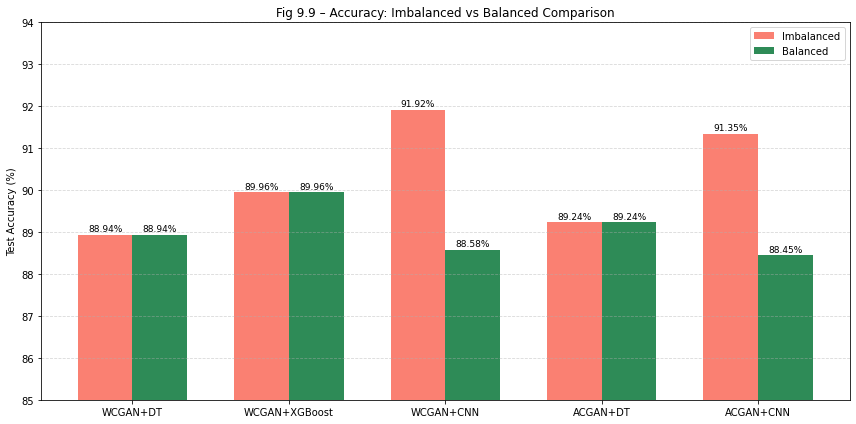

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ['WCGAN+DT', 'WCGAN+XGBoost', 'WCGAN+CNN', 'ACGAN+DT', 'ACGAN+CNN']
imbalanced = [88.94, 89.96, 91.92, 89.24, 91.35]
balanced = [88.94, 89.96, 88.58, 89.24, 88.45]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, imbalanced, width, label='Imbalanced', color='salmon')
bars2 = plt.bar(x + width/2, balanced, width, label='Balanced', color='seagreen')

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.xticks(x, models)
plt.ylabel('Test Accuracy (%)')
plt.title('Fig 9.9 – Accuracy: Imbalanced vs Balanced Comparison')
plt.ylim(85, 94)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# AUC THING 

In [37]:
def plot_roc_curve(y_test,y_pred, classes):
    n_classes=len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC")
    plt.legend(loc="lower right")
    plt.show()

In [38]:
import itertools
from itertools import cycle

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

788/788 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9865
Test results - Loss: 0.043460357934236526 - Accuracy: 98.6465573310852%


In [41]:
print('AUC Score is on Test : ' , AUC(y_test_argmax, y_pred_argmax_test))

AUC Score is on Test :  {0: 0.9971543388806116, 1: 0.979784574407116, 2: 0.7852537514945909, 3: 0.4999801461245235, 4: 0.9868971420745156}


In [42]:
from sklearn.metrics import classification_report
classes=['normal', 'Dos','Probe', 'R2L','U2R']

print("Classification Report on Data Test \n" , classification_report(y_test_argmax, y_pred_argmax_test, target_names=classes))

Classification Report on Data Test 
               precision    recall  f1-score   support

      normal       0.99      1.00      1.00      9181
         Dos       0.97      0.96      0.97      2357
       Probe       0.85      0.57      0.68       224
         R2L       0.00      0.00      0.00        11
         U2R       0.99      0.99      0.99     13422

    accuracy                           0.99     25195
   macro avg       0.76      0.70      0.73     25195
weighted avg       0.99      0.99      0.99     25195



Confusion matrix, without normalization


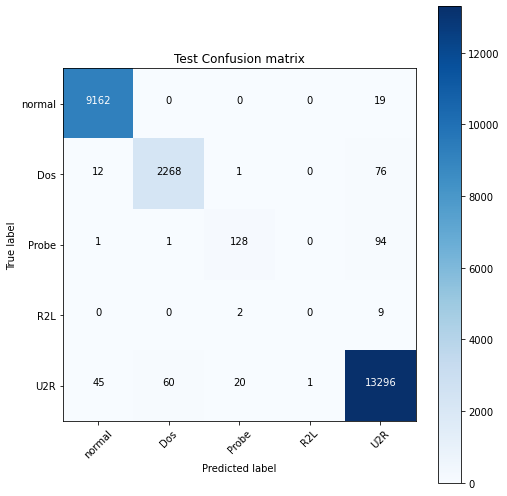

In [43]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test_argmax, y_pred_argmax_test)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Test Confusion matrix')
plt.show()

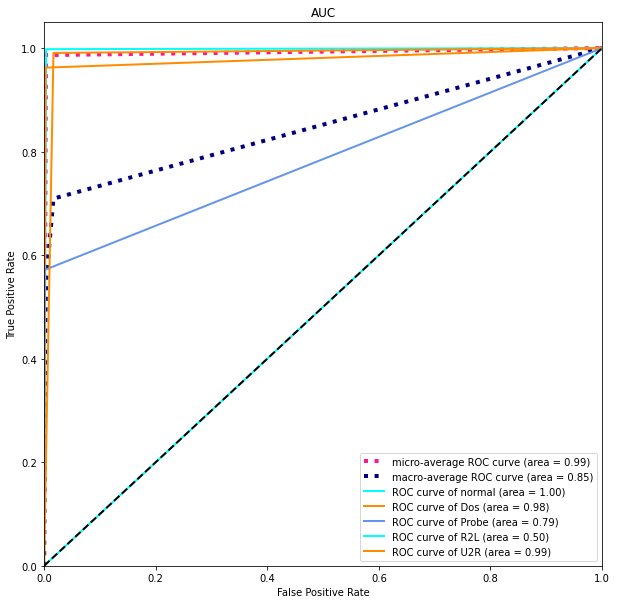

In [44]:
plot_roc_curve(y_test,y_pred_evaluation_test,classes=classes)

In [45]:
from sklearn.manifold import TSNE
tsne2 = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(y_pred_test)

# create dataframe
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((tsne2, y_test_argmax)))# cast targets column to int

target_name = {0:'normal',
               1:'Dos',
               2:'Probe',
               3:'R2L',
               4:'U2R',
             }

cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.loc[:, 'target'] = cps_df.target.map(target_name)

import seaborn as sns
grid = sns.FacetGrid(cps_df, hue="target", height=6)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: 